In [2]:
import os
import pandas as pd
import zipfile

In [ ]:
def bulk_unzip(source_dir, destination_dir):
    # Check if the source directory exists
    if not os.path.exists(source_dir):
        print(f"Source directory '{source_dir}' does not exist.")
        return
    
    # Create the destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Loop through files in the source directory
    for file_name in os.listdir(source_dir):
        file_path = os.path.join(source_dir, file_name)
        
        # Check if the file is a zip file
        if file_name.lower().endswith('.zip'):
            print(f"Extracting {file_name}...")
            
            # Extract the zip file
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(destination_dir)
            
            print(f"{file_name} extracted to {destination_dir}")
        else:
            print(f"{file_name} is not a zip file, skipping...")

# Example usage:
# Replace 'source_directory' and 'destination_directory' with your actual paths
# bulk_unzip('/home/youwombat/202205-House-Search/Large Datasets/NSW Valuer General/Zips', '/home/youwombat/202205-House-Search/Large Datasets/NSW Valuer General/Unzip')
bulk_unzip('/home/youwombat/Large Datasets/NSW Valuer General/Unzip', '/home/youwombat/Large Datasets/NSW Valuer General/Unzip')


In [9]:
# filename = '/home/youwombat/202205-House-Search/Large Datasets/NSW Valuer General/Unzip/001_SALES_DATA_NNME_01022016.DAT'
# Step 1: Create function to read data from the dat file into a pandas DataFrame
def read_dat(filename):
    with open(filename, 'r') as file:
        data = file.readlines()

    # Initialize empty lists to store the data
    data = []
    current_row = []

    # Read the DAT file line by line, only keep lines beginning with B
    with open(filename, 'r') as file:
        for line in file:
            # Remove trailing newline characters and split the line based on ';'
            line = line.strip().split(';')
            
            if line[0] == 'B':
                # If the line starts with 'B', combine it with the data from current_row
                data.append(line[1:-1])

    # Convert the data list into a pandas DataFrame
    return pd.DataFrame(data, columns=['District Code', 'Property Id', 'Sale Counter', 'Download Datetime', 'Property Name', 'Property Unit Number', 'Property House Number', 'Property Street Name',
                                    'Property Locality', 'Property Post Code', 'Area', 'Area Type', 'Contract Date', 'Settlement Date', 'Purchase Price',
                                    'Zoning', 'Nature of Property', 'Primary Purpose', 'Strata Lot Number', 'Component Code', 'Sale Code', '% Interest of Sale',
                                    'Dealing Number'])

# Step 2: Read each dat file in folder one by one and append to dataframe
# Initialize empty DataFrame
df = pd.DataFrame()

# Read each DAT file in the folder
for file in os.listdir('/home/youwombat/Large Datasets/NSW Valuer General/Unzip'):
    if file.endswith('.DAT'):
        
        # Only read files starting with a number between 001 and 099
        if file.startswith('08'): 

            # Read the DAT file using the function we created earlier
            df_temp = read_dat('/home/youwombat/Large Datasets/NSW Valuer General/Unzip/' + file)
            print('Reading ' + file + '...')
            print('Shape of DataFrame: ' + str(df_temp.shape))
            
            # Append the temporary DataFrame to the master DataFrame
            df = pd.concat([df, df_temp])
            print('Shape of master DataFrame: ' + str(df.shape))

# Step 3: Clean the data
# Convert the 'Purchase Price' column to numeric
df['Purchase Price'] = pd.to_numeric(df['Purchase Price'])

# Convert the 'Contract Date' column to datetime
df['Contract Date'] = pd.to_datetime(df['Contract Date'])

# Convert the 'Settlement Date' column to datetime
df['Settlement Date'] = pd.to_datetime(df['Settlement Date'])

# Print the DataFrame
# print(df)


Reading 087_SALES_DATA_NNME_01062020.DAT...
Shape of DataFrame: (7, 23)
Shape of master DataFrame: (7, 23)
Reading 081_SALES_DATA_NNME_23012017.DAT...
Shape of DataFrame: (109, 23)
Shape of master DataFrame: (116, 23)
Reading 085_SALES_DATA_NNME_15072019.DAT...
Shape of DataFrame: (19, 23)
Shape of master DataFrame: (135, 23)
Reading 086_SALES_DATA_NNME_06112017.DAT...
Shape of DataFrame: (23, 23)
Shape of master DataFrame: (158, 23)
Reading 088_SALES_DATA_NNME_19122022.DAT...
Shape of DataFrame: (41, 23)
Shape of master DataFrame: (199, 23)
Reading 088_SALES_DATA_NNME_18062018.DAT...
Shape of DataFrame: (30, 23)
Shape of master DataFrame: (229, 23)
Reading 087_SALES_DATA_NNME_08112021.DAT...
Shape of DataFrame: (22, 23)
Shape of master DataFrame: (251, 23)
Reading 082_SALES_DATA_NNME_08052017.DAT...
Shape of DataFrame: (86, 23)
Shape of master DataFrame: (337, 23)
Reading 081_SALES_DATA_NNME_20092021.DAT...
Shape of DataFrame: (159, 23)
Shape of master DataFrame: (496, 23)
Reading 086

In [49]:
# print(df)

Empty DataFrame
Columns: []
Index: []


In [10]:
# pd.options.display.max_rows = 150
# Combine all the dat files into a pandas dataframe
# 1. Read the data from the dat files
# 2. Combine the data into a single dataframe

import pandas as pd
import numpy as np
import os

# Read each .dat file into a combined DataFrame.
def combine_dat_files(directory):
    dat_files = [file for file in os.listdir(directory) if file.endswith('.DAT')]
    # print('Reading file: {}'.format(dat_files))
    dataframes = []
    for file in dat_files:
        df =pd.read_csv(directory + '/' + file, sep=';')
        print('Reading file: {}'.format(file))
        dataframes.append(df)
    return pd.concat(dataframes)

df = combine_dat_files('/home/youwombat/202205-House-Search/Large Datasets/NSW Valuer General/Unzip')

Reading file: 065_SALES_DATA_NNME_12102015.DAT
Reading file: 243_SALES_DATA_NNME_31072017.DAT
Reading file: 261_SALES_DATA_NNME_12102020.DAT
Reading file: 234_SALES_DATA_NNME_11012021.DAT
Reading file: 262_SALES_DATA_NNME_13122021.DAT
Reading file: 148_SALES_DATA_NNME_15022021.DAT
Reading file: 090_SALES_DATA_NNME_16092019.DAT
Reading file: 042_SALES_DATA_NNME_02102017.DAT
Reading file: 242_SALES_DATA_NNME_04122017.DAT
Reading file: 220_SALES_DATA_NNME_31102022.DAT
Reading file: 537_SALES_DATA_NNME_18122017.DAT
Reading file: 091_SALES_DATA_NNME_31072017.DAT
Reading file: 010_SALES_DATA_NNME_23012017.DAT
Reading file: 087_SALES_DATA_NNME_01062020.DAT
Reading file: 074_SALES_DATA_NNME_09102017.DAT
Reading file: 236_SALES_DATA_NNME_26112018.DAT
Reading file: 139_SALES_DATA_NNME_19112018.DAT
Reading file: 136_SALES_DATA_NNME_11072016.DAT
Reading file: 116_SALES_DATA_NNME_12092022.DAT
Reading file: 142_SALES_DATA_NNME_31072017.DAT
Reading file: 303_SALES_DATA_NNME_06022017.DAT
Reading file:

/tmp/ipykernel_47414/1738484543.py:16: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv(directory + '/' + file, sep=';')


Reading file: ARCHIVE_SALES_1999.DAT
Reading file: 210_SALES_DATA_NNME_02122019.DAT
Reading file: 214_SALES_DATA_NNME_26092022.DAT
Reading file: 034_SALES_DATA_NNME_14122015.DAT
Reading file: 251_SALES_DATA_NNME_19032018.DAT
Reading file: 135_SALES_DATA_NNME_23052016.DAT
Reading file: 085_SALES_DATA_NNME_07032022.DAT
Reading file: 034_SALES_DATA_NNME_20032017.DAT
Reading file: 061_SALES_DATA_NNME_01022016.DAT
Reading file: 529_SALES_DATA_NNME_06062022.DAT
Reading file: 097_SALES_DATA_NNME_02082021.DAT
Reading file: 270_SALES_DATA_NNME_09122019.DAT
Reading file: 097_SALES_DATA_NNME_14102019.DAT
Reading file: 157_SALES_DATA_NNME_12062017.DAT
Reading file: 255_SALES_DATA_NNME_16112020.DAT
Reading file: 268_SALES_DATA_NNME_28112022.DAT
Reading file: 157_SALES_DATA_NNME_30112015.DAT
Reading file: 074_SALES_DATA_NNME_04042016.DAT
Reading file: 171_SALES_DATA_NNME_09122019.DAT
Reading file: 247_SALES_DATA_NNME_17072017.DAT
Reading file: 116_SALES_DATA_NNME_29032021.DAT
Reading file: 260_SALES

/tmp/ipykernel_47414/1738484543.py:16: DtypeWarning: Columns (5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv(directory + '/' + file, sep=';')


Reading file: ARCHIVE_SALES_1997.DAT
Reading file: 253_SALES_DATA_NNME_20012020.DAT
Reading file: 511_SALES_DATA_NNME_14102019.DAT
Reading file: 902_SALES_DATA_NNME_26122022.DAT
Reading file: 144_SALES_DATA_NNME_11102021.DAT
Reading file: 081_SALES_DATA_NNME_06042020.DAT
Reading file: 085_SALES_DATA_NNME_29112021.DAT
Reading file: 244_SALES_DATA_NNME_22012018.DAT
Reading file: 270_SALES_DATA_NNME_23082021.DAT
Reading file: 051_SALES_DATA_NNME_28032022.DAT
Reading file: 043_SALES_DATA_NNME_09052022.DAT
Reading file: 249_SALES_DATA_NNME_05102015.DAT
Reading file: 012_SALES_DATA_NNME_02092019.DAT
Reading file: 231_SALES_DATA_NNME_11122017.DAT
Reading file: 239_SALES_DATA_NNME_21102019.DAT
Reading file: 152_SALES_DATA_NNME_20072020.DAT
Reading file: 135_SALES_DATA_NNME_12022018.DAT
Reading file: 207_SALES_DATA_NNME_16052022.DAT
Reading file: 250_SALES_DATA_NNME_19042021.DAT
Reading file: 002_SALES_DATA_NNME_17052021.DAT
Reading file: 102_SALES_DATA_NNME_05102020.DAT
Reading file: 073_SALES

ParserError: Error tokenizing data. C error: EOF inside string starting at row 7

In [9]:
df

NameError: name 'df' is not defined

In [ ]:
combined_data['sale_dt'] = pd.to_datetime(combined_data['SALE DATE'])
# Analysis 1 - Look at overall min max
# No action required
# Analysis 2 - Only look post 2015
import datetime
from datetime import date
dtm = datetime.datetime(2010, 1, 1, 0, 0, 0, 000000)
combined_data = combined_data[combined_data['sale_dt']>=dtm]
combined_data

,ADDRESS,SALE PRICE,SALE DATE,AREA,STRATA/NON STRATA,MULTI-PROPERTY SALE (Y/N),PROPERTY NUMBER,DEALING NUMBER,EXTRACTION DATE,sale_dt
4,"72 DARLINGTON DRIVE, CHERRYBROOK NSW 2126",2080000,14 January 2023,796.4,NON STRATA,No,636947,AS855613,16 July 2023,2023-01-14
5,"72 DARLINGTON DRIVE, CHERRYBROOK NSW 2126",2100000,13 May 2021,796.4,NON STRATA,No,636947,AR334574,16 July 2023,2021-05-13
7,"6 CANNAN CLOSE, CHERRYBROOK NSW 2126",2150000,3 May 2017,751.3,NON STRATA,No,632744,AM511727,16 July 2023,2017-05-03
10,"10 BOWEN CLOSE, CHERRYBROOK NSW 2126",1370000,26 January 2014,993.6,NON STRATA,No,630331,AI554236,16 July 2023,2014-01-26
12,"7 CANNAN CLOSE, CHERRYBROOK NSW 2126",1140000,3 April 2012,802.3,NON STRATA,No,632729,AH185593,16 July 2023,2012-04-03
14,"17 CHISWICK PLACE, CHERRYBROOK NSW 2126",2875000,10 May 2022,743.8,NON STRATA,No,634710,AS234490,16 July 2023,2022-05-10
17,"20 CANNAN CLOSE, CHERRYBROOK NSW 2126",1910000,2 November 2015,693.7,NON STRATA,No,632737,AK180368,16 July 2023,2015-11-02
21,"3 BOWEN CLOSE, CHERRYBROOK NSW 2126",2480000,15 September 2022,765.2,NON STRATA,No,630290,AS627739,16 July 2023,2022-09-15
24,"12 CANNAN CLOSE, CHERRYBROOK NSW 2126",2000000,17 November 2017,742.0,NON STRATA,No,632741,AN29961,16 July 2023,2017-11-17
25,"12 CANNAN CLOSE, CHERRYBROOK NSW 2126",1537000,15 November 2014,742.0,NON STRATA,No,632741,AJ233609,16 July 2023,2014-11-15


In [ ]:
pd.options.display.max_rows = 25
df_max_dates = combined_data.sort_values('sale_dt').drop_duplicates('ADDRESS', keep='last')
df_min_dates = combined_data.sort_values('sale_dt').drop_duplicates('ADDRESS', keep='first')
df_max_dates
df_min_dates

df2 = df_min_dates.merge(df_max_dates, on='ADDRESS')
df2



,ADDRESS,SALE PRICE_x,SALE DATE_x,AREA_x,STRATA/NON STRATA_x,MULTI-PROPERTY SALE (Y/N)_x,PROPERTY NUMBER_x,DEALING NUMBER_x,EXTRACTION DATE_x,sale_dt_x,SALE PRICE_y,SALE DATE_y,AREA_y,STRATA/NON STRATA_y,MULTI-PROPERTY SALE (Y/N)_y,PROPERTY NUMBER_y,DEALING NUMBER_y,EXTRACTION DATE_y,sale_dt_y
0,"3 CANNAN CLOSE, CHERRYBROOK NSW 2126",1138000,5 October 2011,810.8,NON STRATA,No,632727,AG674206,16 July 2023,2011-10-05,1138000,5 October 2011,810.8,NON STRATA,No,632727,AG674206,16 July 2023,2011-10-05
1,"10 DARLINGTON DRIVE, CHERRYBROOK NSW 2126",892500,18 March 2012,745.8,NON STRATA,No,636986,AG940419,16 July 2023,2012-03-18,1780000,22 April 2020,745.8,NON STRATA,No,636986,AQ147062,16 July 2023,2020-04-22
2,"7 CANNAN CLOSE, CHERRYBROOK NSW 2126",1140000,3 April 2012,802.3,NON STRATA,No,632729,AH185593,16 July 2023,2012-04-03,1140000,3 April 2012,802.3,NON STRATA,No,632729,AH185593,16 July 2023,2012-04-03
3,"10 BOWEN CLOSE, CHERRYBROOK NSW 2126",1370000,26 January 2014,993.6,NON STRATA,No,630331,AI554236,16 July 2023,2014-01-26,1370000,26 January 2014,993.6,NON STRATA,No,630331,AI554236,16 July 2023,2014-01-26
4,"12 CANNAN CLOSE, CHERRYBROOK NSW 2126",1537000,15 November 2014,742.0,NON STRATA,No,632741,AJ233609,16 July 2023,2014-11-15,2000000,17 November 2017,742.0,NON STRATA,No,632741,AN29961,16 July 2023,2017-11-17
5,"20 CANNAN CLOSE, CHERRYBROOK NSW 2126",1910000,2 November 2015,693.7,NON STRATA,No,632737,AK180368,16 July 2023,2015-11-02,1910000,2 November 2015,693.7,NON STRATA,No,632737,AK180368,16 July 2023,2015-11-02
6,"6 CANNAN CLOSE, CHERRYBROOK NSW 2126",2150000,3 May 2017,751.3,NON STRATA,No,632744,AM511727,16 July 2023,2017-05-03,2150000,3 May 2017,751.3,NON STRATA,No,632744,AM511727,16 July 2023,2017-05-03
7,"72 DARLINGTON DRIVE, CHERRYBROOK NSW 2126",2100000,13 May 2021,796.4,NON STRATA,No,636947,AR334574,16 July 2023,2021-05-13,2080000,14 January 2023,796.4,NON STRATA,No,636947,AS855613,16 July 2023,2023-01-14
8,"17 CHISWICK PLACE, CHERRYBROOK NSW 2126",2875000,10 May 2022,743.8,NON STRATA,No,634710,AS234490,16 July 2023,2022-05-10,2875000,10 May 2022,743.8,NON STRATA,No,634710,AS234490,16 July 2023,2022-05-10
9,"3 BOWEN CLOSE, CHERRYBROOK NSW 2126",2480000,15 September 2022,765.2,NON STRATA,No,630290,AS627739,16 July 2023,2022-09-15,2480000,15 September 2022,765.2,NON STRATA,No,630290,AS627739,16 July 2023,2022-09-15


max_sale_yr
2011    0.000000
2012    0.000000
2014    0.000000
2015    0.000000
2017    0.045771
2020    0.089013
2022    0.000000
2023   -0.005704
Name: real_growth, dtype: float64
max_sale_yr
2011    1
2012    1
2014    1
2015    1
2017    2
2020    1
2022    2
2023    1
Name: real_growth, dtype: int64


<Axes: xlabel='max_sale_yr'>

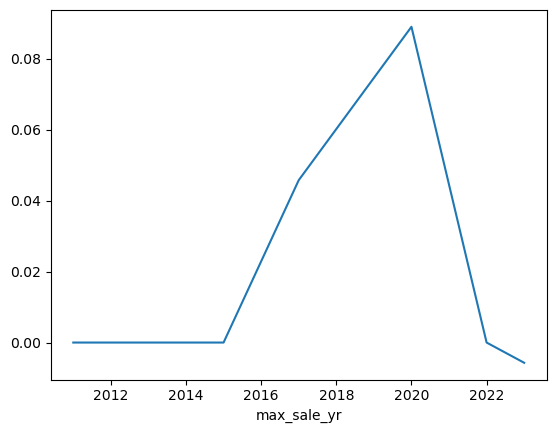

In [ ]:
df2['years_diff'] = (df2['sale_dt_y'] - df2['sale_dt_x']).dt.days / 365.25
# nom_growth = (df2['SALE PRICE_y']/df2['SALE PRICE_x']-1)/df2['years_diff']
# nom_growth

df2['real_growth'] = (df2['SALE PRICE_y']/df2['SALE PRICE_x']).pow(1/df2['years_diff']) - 1
df2['max_sale_yr'] = df2['sale_dt_y'].dt.year
print(df2.groupby('max_sale_yr')['real_growth'].mean())
# df2.groupby('max_sale_yr')['years_diff'].mean()
print(df2.groupby('max_sale_yr')['real_growth'].count())

df2.groupby('max_sale_yr')['real_growth'].mean().plot()

